# Titanic Dataset EDA

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Understanding the problem
Basically we are trying to predict which passengers survived the titanic shipwreck by looking at some passenger data.

This is a classical supervised learning problem, in which we are trying to solve a classification problem with 2 categories: survived and not survived.

The dummy classifier would be use gender as a proxy for survival of the passenger. If a woman, it has survived, if a man, it has not survived.

Let's look at the data and see what it looks like

## Importing data

In [2]:
train_data_path = "./kaggle/input/train.csv"
test_data_path = "./kaggle/input/test.csv"
dummy_predictor_data_path = "./kaggle/output/gender_submission.csv"

In [3]:
train_df = pd.read_csv(train_data_path)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### First impressions
- 12 columns overall, most of them categoric describing the passengers
- PassengerId as the key for a passenger
- Pclass likely to rerepsent the passenger class (probably correlated with ticket price (fare))
- Ticket may provide information on where people came from and an ID
- Cabin may represent clusters of families that are in the same cabin
- Embarked may represent origin of embark
- Sib Sp and Parch require further investigation

In [5]:
# Looping through cateogric features with limited number of options
for feature in set(train_df.columns) - {"PassengerId","Cabin","Fare","Ticket","Name"}:
    print(f"{feature}: {train_df[feature].unique()}")

Embarked: ['S' 'C' 'Q' nan]
Parch: [0 1 2 5 3 4 6]
Pclass: [3 1 2]
Survived: [0 1]
Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp: [1 0 3 4 2 5 8]
Sex: ['male' 'female']


In [6]:
# We do have NaN values in Age and Embarked features
print("# of nulls Age: {}".format(train_df["Age"].isna().sum()))
print("# of nulls Embarked: {}".format(train_df["Embarked"].isna().sum()))

# of nulls Age: 177
# of nulls Embarked: 2


In [7]:
train_df.loc[train_df["Parch"] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [8]:
train_df.loc[train_df["Ticket"] == "347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [9]:
# Parch : number of parents aboard
# SibSp : number of children aboard

### The dummy classifier (how should it perform)

In [10]:
dummy_survival_classifier = lambda person_sex: person_sex == "female"

In [11]:
pred_survived = train_df["Sex"].map(dummy_survival_classifier)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cfm = 100*confusion_matrix(train_df["Survived"], pred_survived)/891

In [14]:
tn, fp, fn, tp = cfm.ravel()
print(f"tn: {tn}")
print(f"fp: {fp}")
print(f"fn: {fn}")
print(f"tp: {tp}")

tn: 52.525252525252526
fp: 9.090909090909092
fn: 12.2334455667789
tp: 26.150392817059483


In [15]:
pred_survived.sum()/pred_survived.count()

0.35241301907968575

In [16]:
train_df["Survived"].sum()/train_df["Survived"].count()

0.3838383838383838

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [18]:
# (tp + tn) / instances
accuracy_score(train_df["Survived"], pred_survived)

0.7867564534231201

In [19]:
# tp / (tp + fp)
precision_score(train_df["Survived"], pred_survived)

0.7420382165605095

## Cleaning and modeling
Since this is a binary classifier (supervised), we are going to apply some simple models to predict whether a passenger will survive or not. Preferably one that offers better evaluation metrics when compared to the dummy classifier (which uses only sex).

As evaluation metric, I'm picking mainly accuracy (and precision as a quick check), given that a false positives are not a big issue for this dummy project.

I'm using pandas pipelines as a first option to handle transformations.

As for the model, we can use both logistic regressions and other ensemble methods, such as decision trees and random forests. I'm choosing random forest first in order to do some feature elicitation while preventing some key transformations such as encoding and scaling

### Cleaning functions

In [20]:
def drop_nulls(df,column):
    return df.dropna(subset=[column])

def fill_zeros(df,column):
    df[column] = df[column].fillna(0)
    return df

def fill_mean(df,column, fill_override=None):
    if fill_override != None:
        fill_value = fill_override
    else:
        fill_value = df[column].mean()
    df[column] = df[column].fillna(fill_value)
    return df

def fill_median(df,column, fill_override=None):
    if fill_override != None:
        fill_value = fill_override
    else:
        fill_value = df[column].median()
        
    df[column] = df[column].fillna(fill_value)
    return df

def fill_mode(df,column, fill_override=None):
    if fill_override != None:
        fill_value = fill_override
    else:
        fill_value = df[column].mode()[0]
        
    df[column] = df[column].fillna(fill_value)
    return df

def handle_nulls(df, column, method, fill_override=None):
    choices = {
        'drop':        drop_nulls,
        'fill_zeros':  fill_zeros,
        'fill_mean':   fill_mean,
        'fill_median': fill_median,
        'fill_mode':   fill_mode,
    }
    
    if (type(column) != str):
        raise TypeError("Columns should be a string")
    
    if len(column) == 0:
        raise ValueError("Column length should be greater than zero")
    
    if not method in choices.keys():
        raise ValueError(f"method should be one of the following options {list(choices.keys())}")
    
    func = choices.get(method)
    return func(df,column, fill_override) if method != "drop" else func(df,column)

### Applying transformations

#### Handling Nulls
- Embarked has only 2 nulls, therefore I'm dropping these 2 instances
- Age has a significant number of nulls, and I guess this can be an important feature, so therefore I'm using mean

<AxesSubplot:>

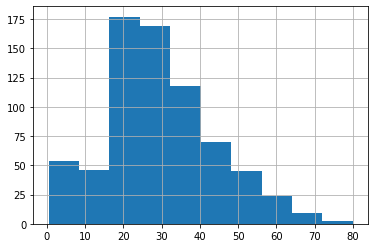

In [21]:
train_df["Age"].hist()

In [22]:
print(train_df["Age"].mode())
print(train_df["Age"].mean())
print(train_df["Age"].median())

0    24.0
dtype: float64
29.69911764705882
28.0


<AxesSubplot:>

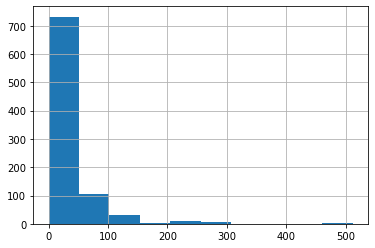

In [83]:
train_df["Fare"].hist()

In [84]:
print(train_df["Fare"].mode())
print(train_df["Fare"].mean())
print(train_df["Fare"].median())

0    8.05
dtype: float64
32.2042079685746
14.4542


#### Default random forest predictor - finding most important features

One of the first steps that will guide us to find a best estimator model for passenger survival is generate a simple random forest classifier model and run a feature importance analysis

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
feature_names = ["Sex","Age","Pclass","SibSp","Parch","Fare","Embarked"]
predicted_variable = "Survived"

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df[feature_names], 
    train_df[predicted_variable],
    test_size = 0.3,
    random_state = 7
)

#### Dummy Classifier
Let's start with this one, that require neither cleaning nor fitting. It's just a proxy for sex

In [26]:
class DummyTitanicClassifier:
    """
        Simple dummy classifier for Titanic dataset
        Uses 'Sex' feature as a predictor, if 'female', then survived
    """
    
    def __init__(self):
        self.sex_series = pd.Series([""])
        pass
    
    def __dummy_survival_classifier(self, person_sex):
        if not person_sex in {"male","female"}:
            raise ValueError("Feature values should be only 'male' or 'female'")
        return person_sex == "female"
    
    def fit(self, series):
        self.sex_series = series
        
    def predict(self):
        return self.sex_series.map(self.__dummy_survival_classifier)

In [27]:
dummy_model = DummyTitanicClassifier()
dummy_model.fit(X_test["Sex"])
y_pred_dummy = dummy_model.predict()
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_precision = precision_score(y_test, y_pred_dummy)

In [28]:
print(f"Model: Dummy Sex,  Accuracy: {dummy_accuracy}, Precision: {dummy_precision}")

Model: Dummy Sex,  Accuracy: 0.7425373134328358, Precision: 0.7263157894736842


#### Random Forest Classifier (default)
Now we are doing something sligthly better, a random forest classifier.
We are only handling nulls from 'Age' and 'Embarked'
We are also using only a small subset of features (ignoring those with lots of names, ids and tickets to prevent noise from entering the model)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

We should apply some transformations both in train and test dataset. Be careful with 3 things in here:
- **Data leakeage** (same constants that treat train data should be applyed on test, no train data on test and vice versa)
- **Handling nulls** - we are dropping only the nulls in features that have few instances (Embarked), while bootstrapping the mean in the other features
- **Encoding:** One Hot encoding increases dimensionality in high cardinality features and creates a scenario of sparse data, which decreases Decision trees performance. On the other hand we want to convert string labels to numbers, and we will use labelEncoders for that

In [30]:
def fit_encoders(X):
    le_sex = LabelEncoder()
    le_embarked = LabelEncoder()

    le_sex.fit(X["Sex"])
    le_embarked.fit(X["Embarked"])
    
    return le_sex, le_embarked

In [31]:
def encode_categorical_features(X, le_sex, le_embarked):
    X["Sex"] = le_sex.transform(X["Sex"])
    X["Embarked"] = le_embarked.transform(X["Embarked"])
    return X

In [86]:
def rf_treatment_pipeline(X, age_mean, fare_median, le_sex, le_embarked):
    return (
        X
        .copy()
        .pipe(handle_nulls, "Embarked","drop")
        .pipe(handle_nulls, "Age",method="fill_mean", fill_override=age_mean)
        .pipe(handle_nulls,"Fare",method="fill_median", fill_override=fare_median)
        .pipe(encode_categorical_features, le_sex, le_embarked)
    )

In [34]:
age_mean = X_train["Age"].mean()

In [85]:
fare_median = X_train["Fare"].median()

In [35]:
le_sex, le_embarked = fit_encoders(X_train)

In [88]:
X_train_transf = rf_treatment_pipeline(X_train, age_mean, fare_median, le_sex, le_embarked)
y_train_transf = y_train.filter(items=X_train_transf.index, axis="index")

X_test_transf = rf_treatment_pipeline(X_test, age_mean, fare_median, le_sex, le_embarked)
y_test_transf = y_test.filter(items=X_test_transf.index, axis="index")

In [89]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_transf, y_train_transf)
y_pred_rf = rf_model.predict(X_test_transf)

rf_accuracy = accuracy_score(y_test_transf, y_pred_rf)
rf_precision = precision_score(y_test_transf,y_pred_rf)

In [90]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289


In [91]:
feature_importances = {}
for feature, importance in zip(X_test_transf.columns, rf_model.feature_importances_):
    feature_importances[feature] = importance

Sex, age and Fare seem to be the most relevant features, followed  by Pclass and SibSp

In [92]:
feature_importances

{'Sex': 0.3045480136490247,
 'Age': 0.2383943617043611,
 'Pclass': 0.07572120669471102,
 'SibSp': 0.05591129967870207,
 'Parch': 0.04391187796324098,
 'Fare': 0.24712853722468808,
 'Embarked': 0.034384703085272014}

#### Decision Tree Classifier
So, we were able to build a slightly better than dummy classifier by using a standard random forest tree, now let's try other models to see if we can achieve better results.

Why not try something simpler than Random Forest, such as a Decision tree. They are prone to overfitting and high variance, therefore I have low expectatives regarding its result, but this is an educational example, so let's try it

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [94]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_transf, y_train_transf)
y_pred_dt = dt_model.predict(X_test_transf)

dt_accuracy = accuracy_score(y_test_transf, y_pred_dt)
dt_precision = precision_score(y_test_transf, y_pred_dt)

In [95]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree	Accuracy: 0.7255639097744361	Precision: 0.7078651685393258


As expected, we got a terrible performance on the Decision Tree classifier, even worse than the dummy Sex classifier. Let's investigate and try to get a better result

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

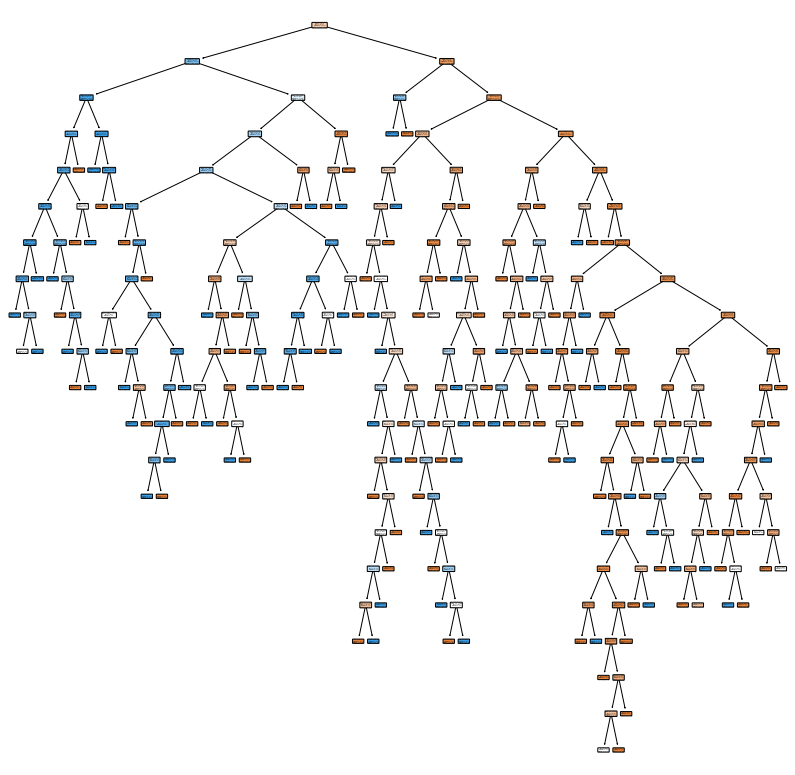

In [97]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    dt_model,
    feature_names = X_test_transf.columns,
    filled = True,
    rounded = True,
    precision = 2
)

As we can see, a pretty heavy tree. Let's try set the max depth to the number of features (~7)

In [98]:
dt_model = DecisionTreeClassifier(max_depth=7, min_samples_split=10)
dt_model.fit(X_train_transf, y_train_transf)
y_pred_dt = dt_model.predict(X_test_transf)

dt_accuracy = accuracy_score(y_test_transf, y_pred_dt)
dt_precision = precision_score(y_test_transf, y_pred_dt)

In [99]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree	Accuracy: 0.7556390977443609	Precision: 0.7777777777777778


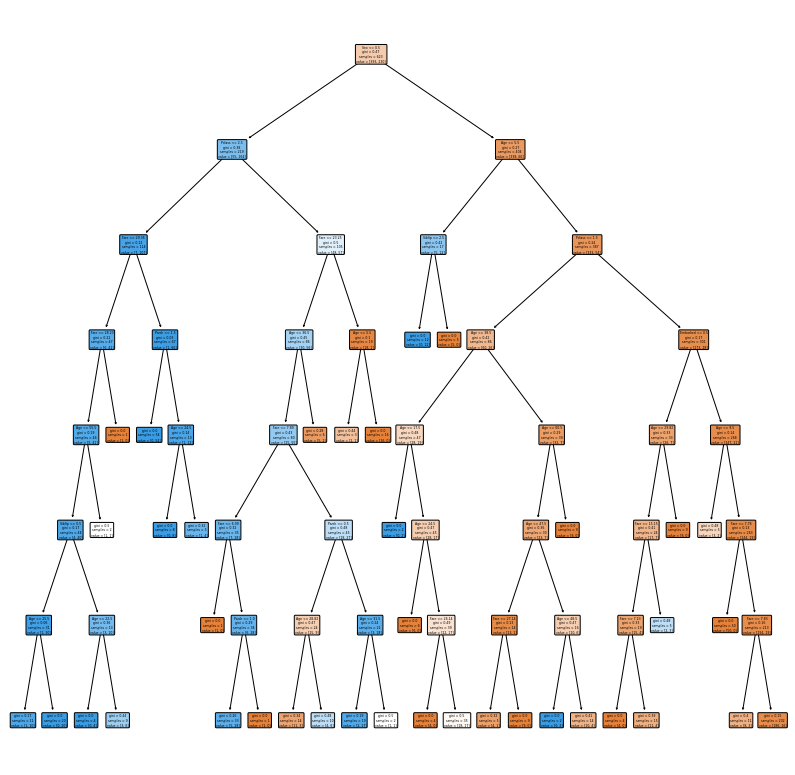

In [100]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    dt_model,
    feature_names = X_test_transf.columns,
    filled = True,
    rounded = True,
    precision = 2
)

Now, we are talking of some improvement! Let's be more restrict to decision tree criteria (reducing overfitting)

In [101]:
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
dt_model.fit(X_train_transf, y_train_transf)
y_pred_dt = dt_model.predict(X_test_transf)

dt_accuracy = accuracy_score(y_test_transf, y_pred_dt)
dt_precision = precision_score(y_test_transf, y_pred_dt)

In [102]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree	Accuracy: 0.7556390977443609	Precision: 0.7528089887640449


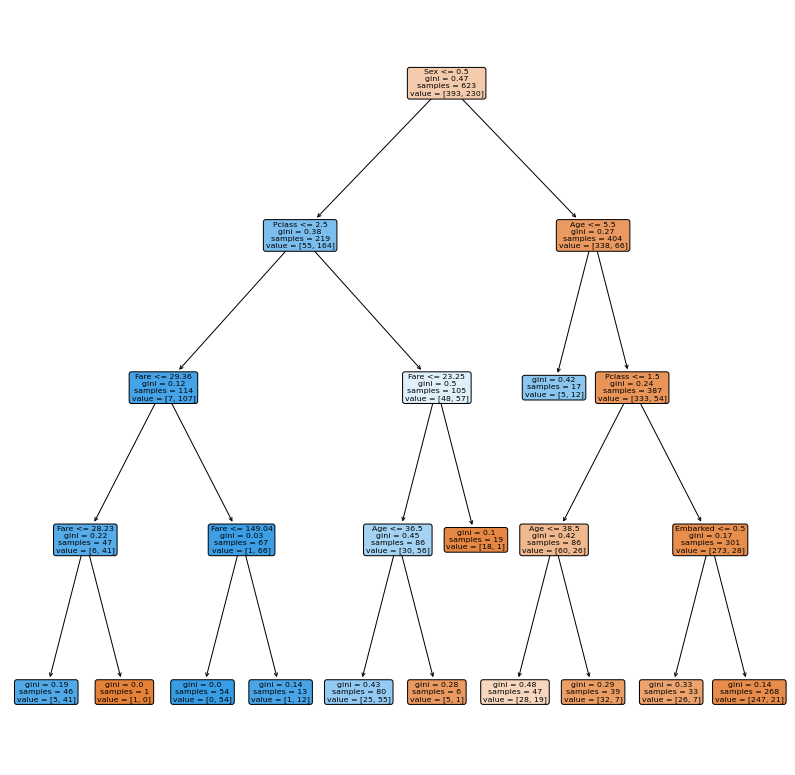

In [103]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    dt_model,
    feature_names = X_test_transf.columns,
    filled = True,
    rounded = True,
    precision = 2,
)

Just as a reference, let's see if our decision tree creates our dummy classifier

In [104]:
dt_model = DecisionTreeClassifier(max_depth=1, min_samples_split=20)
dt_model.fit(X_train_transf, y_train_transf)
y_pred_dt = dt_model.predict(X_test_transf)

dt_accuracy = accuracy_score(y_test_transf, y_pred_dt)
dt_precision = precision_score(y_test_transf, y_pred_dt)

In [105]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree	Accuracy: 0.7406015037593985	Precision: 0.7204301075268817


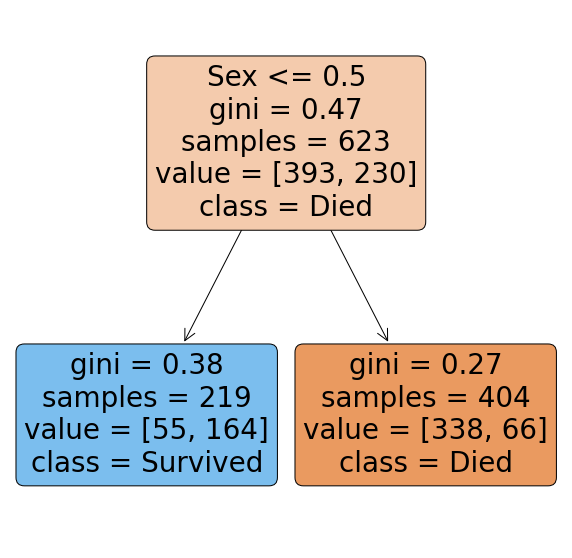

In [106]:
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    dt_model,
    feature_names = X_test_transf.columns,
    class_names = ["Died","Survived"],
    filled = True,
    rounded = True,
    precision = 2,
)

In [107]:
y_train_transf.value_counts()

0    393
1    230
Name: Survived, dtype: int64

In [108]:
y_test_transf.value_counts()

0    156
1    110
Name: Survived, dtype: int64

Just as a reference, let's see a specific tree from our random forest classifier. Incredible, super complex

In [109]:
len(rf_model.estimators_)

100

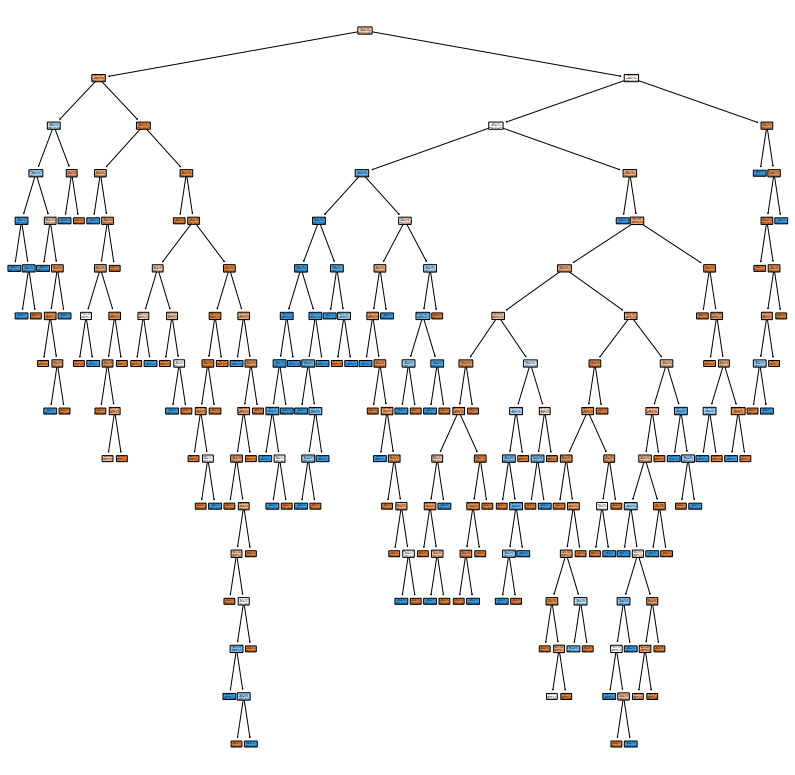

In [110]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    rf_model.estimators_[99],
    feature_names = X_test_transf.columns,
    class_names = ["Died","Survived"],
    filled = True,
    rounded = True,
    precision = 2,
)

#### Optimizing our Random Forest Classifier
We could test logistic regression.... but odds are that it will perform poorly, as decision trees are better suited for unscaled and non linear relationships.

In [111]:
rf_model_2 = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 7,
    min_samples_split = 10,
    n_jobs =3,
    random_state = 42
)

In [112]:
rf_model_2.fit(X_train_transf, y_train_transf)
y_pred_rf_2 = rf_model_2.predict(X_test_transf)
rf2_accuracy = accuracy_score(y_test_transf, y_pred_rf_2)
rf2_precision = precision_score(y_test_transf, y_pred_rf_2)

In [113]:
print(f"Model:\tDummy Sex\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")
print(f"Model:\tRandom Forest 2\tAccuracy: {rf2_accuracy}\tPrecision: {rf2_precision}")

Model:	Dummy Sex	Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest	Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree	Accuracy: 0.7406015037593985	Precision: 0.7204301075268817
Model:	Random Forest 2	Accuracy: 0.7819548872180451	Precision: 0.8333333333333334


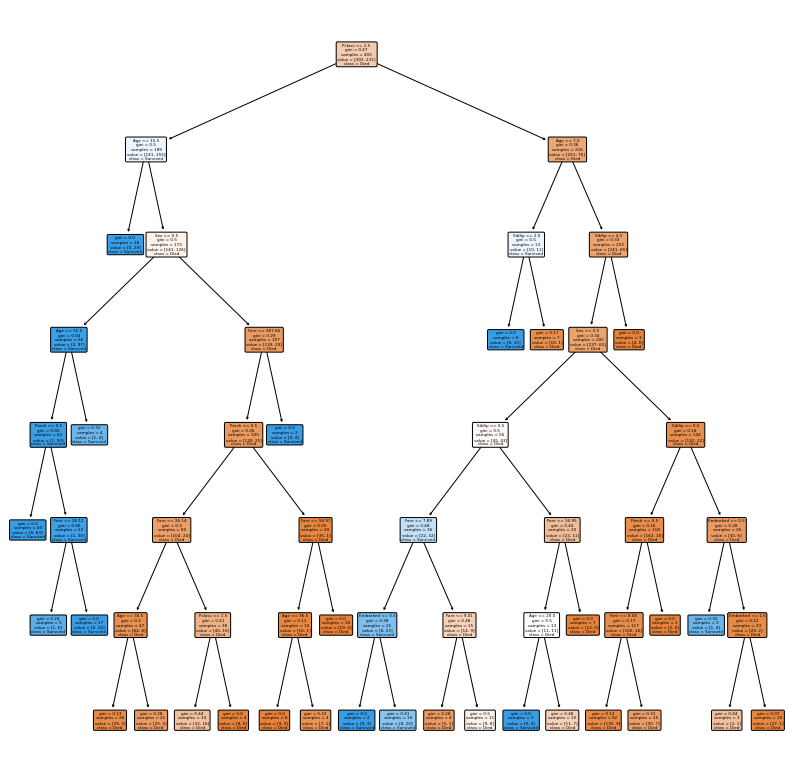

In [114]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree_plot = plot_tree(
    rf_model_2.estimators_[99],
    feature_names = X_test_transf.columns,
    class_names = ["Died","Survived"],
    filled = True,
    rounded = True,
    precision = 2,
)

In [115]:
def get_optimized_random_forest(max_depth_range, min_samples_split_range):
    best_model = rf_model
    best_accuracy = accuracy_score(y_test_transf, y_pred_rf)

    for depth in range(*max_depth_range):
        for samples_split in range (*min_samples_split_range):
            # defines model
            model = RandomForestClassifier(
                n_estimators = 100,
                max_depth = depth,
                min_samples_split = samples_split,
                n_jobs = 3,
                bootstrap = True,
                random_state = 42,
            )
            # calculates model
            model.fit(X_train_transf,y_train_transf)
            y_pred = model.predict(X_test_transf)
            accuracy = accuracy_score(y_test_transf,y_pred)

            # evaluates and chooses the best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

    best_precision = precision_score(y_test_transf, y_pred_rf) 
    
    return best_model, best_accuracy, best_precision

In [116]:
best_model, best_accuracy, best_precision = get_optimized_random_forest(
    max_depth_range=(2,20),
    min_samples_split_range=(2,30)
)
print(f"Model:\tDummy Sex\t\tAccuracy: {dummy_accuracy}\tPrecision: {dummy_precision}")
print(f"Model:\tRandom Forest\t\tAccuracy: {rf_accuracy}\tPrecision: {rf_precision}")
print(f"Model:\tDecision Tree\t\tAccuracy: {dt_accuracy}\tPrecision: {dt_precision}")
print(f"Model:\tBest Random Forest\tAccuracy: {best_accuracy}\tPrecision: {best_precision}")

Model:	Dummy Sex		Accuracy: 0.7425373134328358	Precision: 0.7263157894736842
Model:	Random Forest		Accuracy: 0.7706766917293233	Precision: 0.7525773195876289
Model:	Decision Tree		Accuracy: 0.7406015037593985	Precision: 0.7204301075268817
Model:	Best Random Forest	Accuracy: 0.8045112781954887	Precision: 0.7525773195876289


In [117]:
best_model.max_depth

13

In [118]:
best_model.min_samples_split

7

### Submitting a first version for kaggle
Ok, we tested and optimized until we found a model that optimizes accuracy pretty reasonably. Let's try with the real data

In [119]:
test_df = pd.read_csv(test_data_path)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
# Looping through cateogric features with limited number of options
for feature in set(train_df.columns) - {"PassengerId","Cabin","Fare","Ticket","Name"}:
    print(f"{feature}: {train_df[feature].unique()}")

Embarked: ['S' 'C' 'Q' nan]
Parch: [0 1 2 5 3 4 6]
Pclass: [3 1 2]
Survived: [0 1]
Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp: [1 0 3 4 2 5 8]
Sex: ['male' 'female']


In [121]:
# Looping through cateogric features with limited number of options
for feature in set(test_df.columns) - {"PassengerId","Cabin","Fare","Ticket","Name"}:
    print(f"{feature}: {test_df[feature].unique()}")

Embarked: ['Q' 'S' 'C']
Parch: [0 1 3 2 4 6 5 9]
Pclass: [3 2 1]
Age: [34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]
SibSp: [0 1 2 3 4 5 8]
Sex: ['male' 'female']


In [122]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [123]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [124]:
X_sub = test_df[feature_names]

In [127]:
# Let's use the same treatment pipeline, encoders and means we used
X_sub_transf = rf_treatment_pipeline(X_sub, age_mean, fare_median, le_sex, le_embarked)

In [128]:
X_sub_transf.head()

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
0,1,34.5,3,0,0,7.8292,1
1,0,47.0,3,1,0,7.0000,2
2,1,62.0,2,0,0,9.6875,1
3,1,27.0,3,0,0,8.6625,2
4,0,22.0,3,1,1,12.2875,2


In [129]:
y_pred_sub = best_model.predict(X_sub_transf)

In [135]:
y_pred_sub.shape

(418,)

In [133]:
test_df["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [137]:
df_sub = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": y_pred_sub})
df_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [139]:
df_sub.to_csv("./kaggle/output/initial_submission.csv",index=False)